# Distribuzioni di v.c. discrete

In questo Capitolo verranno esaminate le principali distribuzioni di probabilità delle variabili casuali discrete. Un esperimento casuale che può dare luogo a solo due possibili esiti (successo, insuccesso) è modellabile con una variabile casuale di Bernoulli. Una sequenza di prove di Bernoulli costituisce un processo Bernoulliano. Il numero di successi dopo $n$ prove di Bernoulli corrisponde ad una variabile casuale che segue la legge binomiale. La distribuzione binomiale risulta da un insieme di prove di Bernoulli solo se il numero totale $n$ è fisso per disegno. Se il numero di prove è esso stesso una variabile casuale, allora il numero di successi nella corrispondente sequenza di prove bernoulliane segue al distribuzione di Poisson. Concluderemo con la distribuzione discreta uniforme.

## Una prova Bernoulliana

Se un esperimento casuale ha solo due esiti possibili, allora le repliche indipendenti di questo esperimento sono chiamate "prove Bernoulliane" (il lancio di una moneta è il tipico esempio).

```{admonition} Definizione
Viene detta variabile di Bernoulli una variabile casuale discreta $Y = \{0, 1\}$ con la seguente distribuzione di probabilità:

$$
P(Y \mid \theta) =
  \begin{cases}
    \theta     & \text{se $Y = 1$}, \\
    1 - \theta & \text{se $Y = 0$},
  \end{cases}
$$

con $0 \leq \theta \leq 1$. Convenzionalmente l'evento $\{Y = 1\}$ con probabilità $\theta$ viene chiamato "successo" mentre l'evento $\{Y = 0\}$ con probabilità $1-\theta$ viene chiamato "insuccesso".
```

Applicando l'operatore di valore atteso e di varianza, otteniamo

$$
\begin{align}
\mathbb{E}(Y) &= 0 \cdot P(Y=0) + 1 \cdot P(Y=1) = \theta, \\
\mathbb{V}(Y) &= (0 - \theta)^2 \cdot P(Y=0) + (1 - \theta)^2 \cdot P(Y=1) = \theta(1-\theta).
\end{align}
$$ (eq-ev-var-bern)

Scriviamo $Y \sim Bernoulli(\theta)$ per indicare che la variabile casuale $Y$ ha una distribuzione Bernoulliana di parametro $\theta$.

Nel caso del lancio di una moneta equilibrata la variabile casuale di Bernoulli assume i valori $0$ e $1$. La distribuzione di massa di probabilità è pari a $\frac{1}{2}$ in corrispondenza di entrambi i valori. La funzione di distribuzione vale $\frac{1}{2}$ per $Y = 0$ e $1$ per $Y = 1$.

## Una sequenza di prove Bernoulliane

La distribuzione binomiale è rappresentata dall'elenco di tutti i possibili numeri di successi $Y = \{0, 1, 2, \dots n\}$ che possono essere osservati in $n$ prove Bernoulliane indipendenti di probabilità $\theta$, a ciascuno dei quali è associata la relativa probabilità. Esempi di una distribuzione binomiale sono i risultati di una serie di lanci di una stessa moneta o di una serie di estrazioni da un'urna (con reintroduzione). La distribuzione binomiale di parametri $n$ e $\theta$ è in realtà una famiglia di distribuzioni: al variare dei parametri $\theta$ e $n$ variano le probabilità.

```{admonition} Definizione
La probabilità di ottenere $y$ successi e $n-y$ insuccessi in $n$ prove Bernoulliane è data dalla distribuzione binomiale:

$$
\begin{align}
P(Y=y) &= \binom{n}{y} \theta^{y} (1-\theta)^{n-y} \notag \\
&= \frac{n!}{y!(n-y)!} \theta^{y} (1-\theta)^{n-y}, 
\end{align}
$$ (eq-binomialdistribution)

dove $n$ = numero di prove Bernoulliane, $\theta$ = probabilità di successo in ciascuna prova e $y$ = numero di successi.
```

L'eq. {eq}`eq-binomialdistribution` può essere derivata nel modo seguente. Indichiamo con $S$ il successo e con $I$ l'insuccesso di ciascuna prova. Una sequenza di $n$ prove Bernoulliane darà come esito una sequenza di $n$ elementi $S$ e $I$. Ad esempio, una sequenza che contiene $y$ successi è la seguente:

$$
\overbrace{SS\dots S}^\text{$y$ volte} \overbrace{II\dots I}^\text{$n-y$ volte}
$$

Essendo $\theta$ la probabilità di $S$ e $1-\theta$ la probabilità di $I$, la probabilità di ottenere la specifica sequenza riportata sopra è

$$
\begin{equation}
\overbrace{\theta \theta\dots \theta}^\text{$y$ volte} \overbrace{(1-\theta)(1-\theta)\dots (1-\theta)}^\text{$n-y$ volte} = \theta^y \cdot (1-\theta)^{n-y}.
\end{equation}
$$ (eq-demo-bino-kernel)

Non siamo però interessati alla probabilità di una *specifica* sequenza di $S$ e $I$ ma, bensì, alla probabilità di osservare una *qualsiasi* sequenza di $y$ successi in $n$ prove. In altre parole, vogliamo la probabilità dell'unione di tutti gli eventi corrispondenti a $y$ successi in $n$ prove.

È immediato notare che una qualsiasi altra sequenza contenente esattamente $y$ successi avrà sempre come probabilità $\theta^y \cdot (1-\theta)^{n-y}$: il prodotto infatti resta costante anche se cambia l'ordine dei fattori.[^022_discr_rv_distr-1] Per trovare il risultato cercato dobbiamo moltiplicare l'eq. {eq}`eq-demo-bino-kernel` per il numero di sequenze possibili di $y$ successi in $n$ prove.

Il numero di sequenze che contengono esattamente $y$ successi in $n$ prove. La risposta è fornita dal coefficiente binomiale:

$$
\binom{n}{y} = \frac{n!}{y!(n-y)!},
$$ (eq-binomial-coefficient)

dove il simbolo $n!$ si legge $n$ fattoriale ed è uguale al prodotto di $n$ numeri interi decrescenti a partire da $n$. Per definizione $0! = 1$.

Essendo la probabilità dell'unione di $K$ elementi incompatibili uguale alla somma delle loro rispettive probabilità, e dato che le sequenze di $y$ successi in $n$ prove hanno tutte la stessa probabilità, per trovare la formula della distributione binomiale @eq-binomialdistribution è sufficiente moltiplicare l'eq. {eq}`eq-demo-bino-kernel` per la {eq}`eq-binomial-coefficient`.

[^022_discr_rv_distr-1]: Viene detta *scambiabilità* la proprietà per cui l'ordine con cui compiamo le osservazioni è irrilevante per l'assegnazione delle probabilità.

Importiamo i pacchetti che ci servono.

In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import pandas as pd
import arviz as az

%config InlineBackend.figure_format = 'retina'
az.style.use("arviz-darkgrid")
plt.style.use('tableau-colorblind10')

**scipy** contiene funzioni analitiche per una vasta gamma di distribuzioni e funzioni di massa di probabilità; le potete trovare [qui](https://docs.scipy.org/doc/scipy/reference/stats.html). Per la binomiale, useremo `scipy.stats.binom`. 

Esistono due modi per usare `scipy` per la binomiale. È possibile prima dichiarare un oggetto che corrisponde ad una variabile casuale, ad esempio `rv = binom(n, theta)`, e poi chiamare `rv.pmf(y)`. Oppure si può usare la chiamata `binom.pmf(y, n, theta)`. Usiamo il secondo metodo.

In [2]:
n = 20
theta = 0.3
y = np.arange(0, 15)
print(*y)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14


Trovo le probabilità associate a 0, 1, ..., 14 successi in 20 prove con $p$ = 0.3.

In [3]:
st.binom.pmf(y, n, theta)

array([0.00079792, 0.00683934, 0.02784587, 0.07160367, 0.13042097,
       0.17886305, 0.19163898, 0.16426199, 0.11439674, 0.06536957,
       0.03081708, 0.01200665, 0.00385928, 0.00101783, 0.00021811])

Rappresento graficamente la funzione di massa di probabilità.

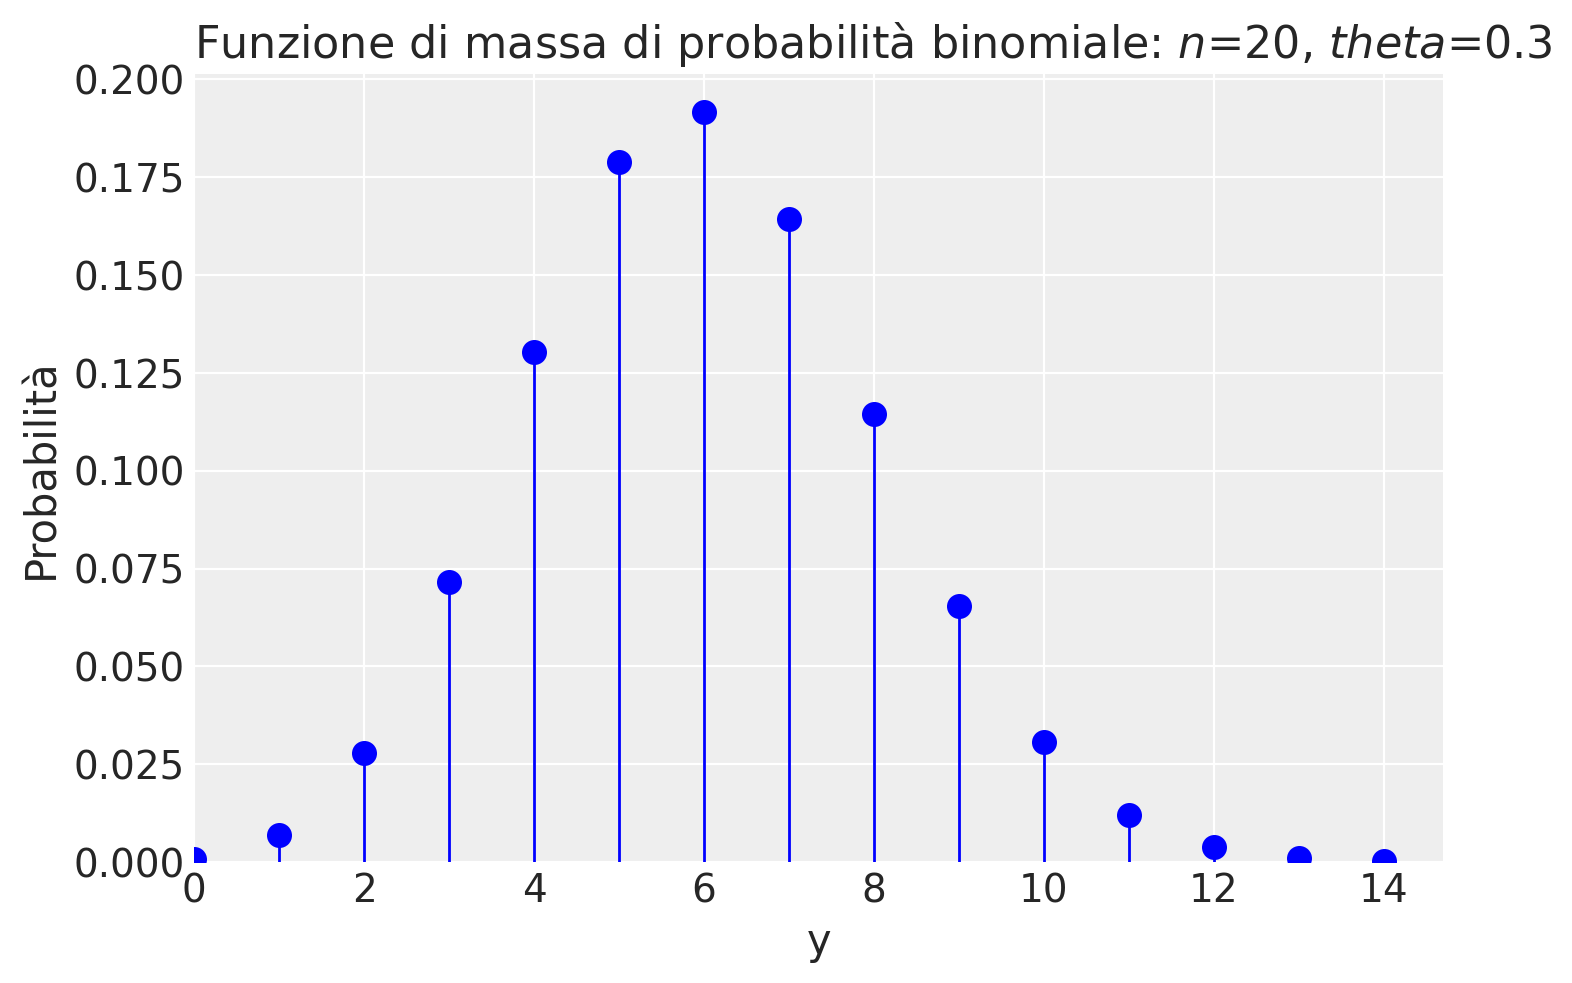

In [4]:
fig, ax = plt.subplots()
ax.plot(y, st.binom.pmf(y, n, theta), "bo", ms=8)
ax.vlines(y, 0, st.binom.pmf(y, n, theta), colors="b", linestyles="-", lw=1)
ax.set_title(f"Funzione di massa di probabilità binomiale: $n$={n}, $theta$={theta}", loc="left")
ax.set_xlabel("y")
ax.set_ylabel("Probabilità")
ax.set_xlim(0, None)
ax.set_ylim(0, None)
plt.show()

Per fare un altro esempio, mostriamo qui la distribuzione di probabilità di alcune distribuzioni binomiali, per due valori di $n$ e $\theta$, è fornita nella figura seguente.

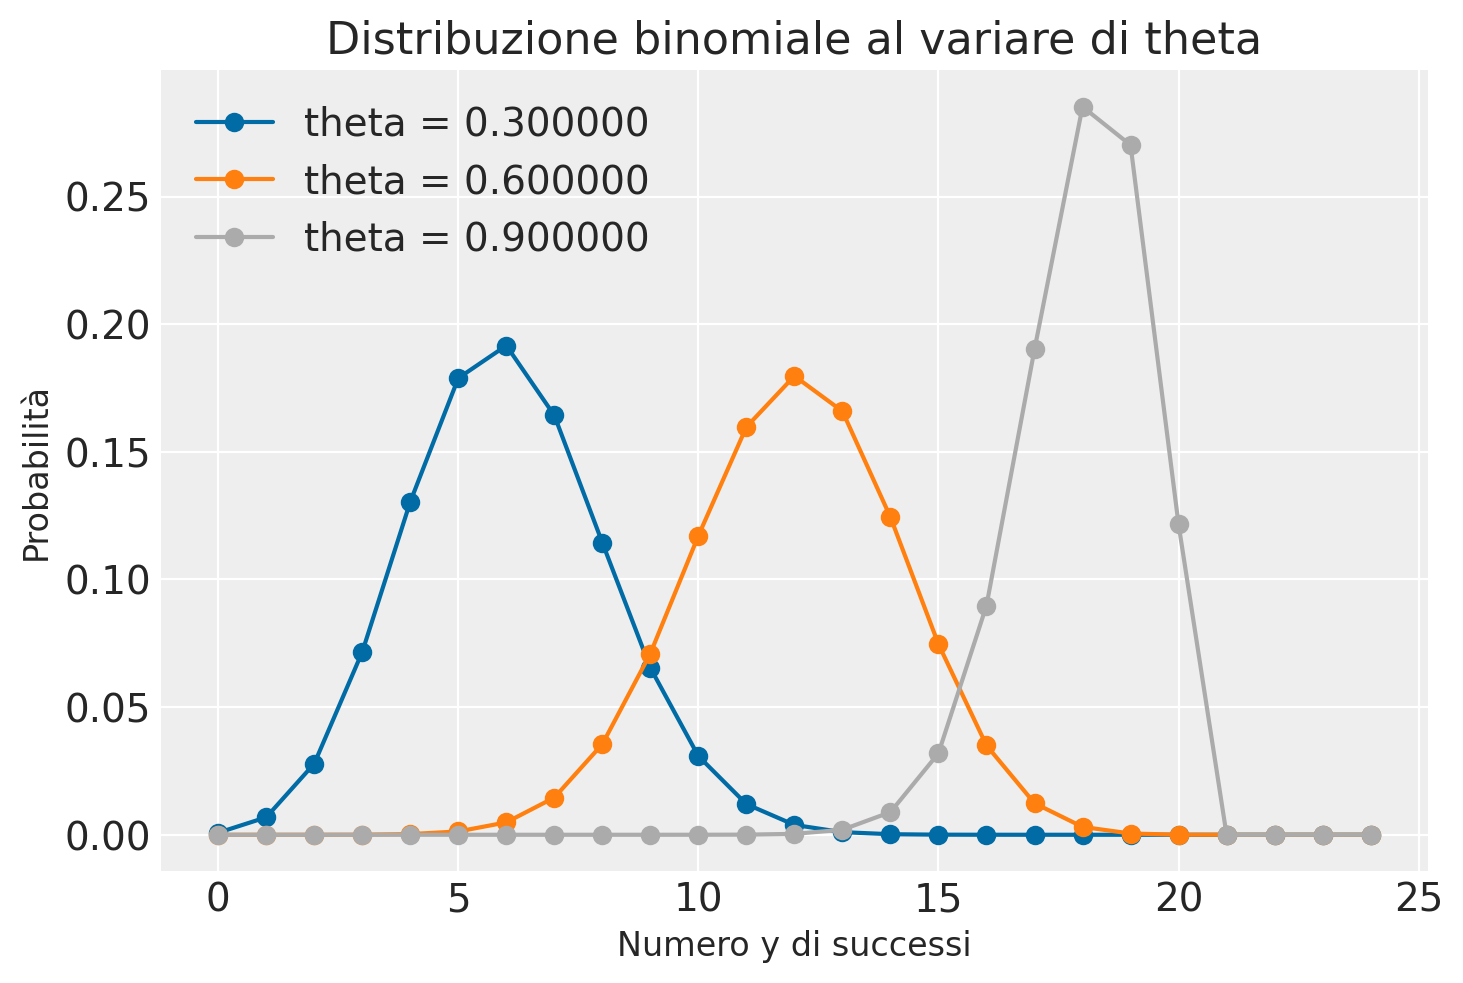

In [5]:
for theta in range(3, 10, 3):
    y = np.arange(0, 25)
    binom = st.binom.pmf(y, 20, 0.1*theta)
    plt.plot(y, binom, '-o', label="theta = {:f}".format(0.1*theta))
    plt.xlabel('Numero y di successi', fontsize=12)
    plt.ylabel('Probabilità', fontsize=12)
    plt.title("Distribuzione binomiale al variare di theta")
    plt.legend()

Esaminiamo più attentamente l'uso di `st.binom.pmf`. Usando l'eq. {eq}`eq-binomialdistribution`,  troviamo, ad esempio, la probabilità di $y = 2$ successi in $n = 4$ prove Bernoulliane indipendenti con $\theta = 0.2$.

$$
\begin{aligned}
P(Y=2) &= \frac{4!}{2!(4-2)!} 0.2^{2} (1-0.2)^{4-2} \notag  \\
 &= \frac{4 \cdot 3 \cdot 2 \cdot 1}{(2 \cdot 1)(2 \cdot 1)}
0.2^{2} 0.8^{2} = 0.1536. \notag
\end{aligned}
$$

Ripetendo i calcoli per i valori $y = 0, \dots, 4$ troviamo la distribuzione binomiale di parametri $n = 4$ e $\theta = 0.2$:

|  y  | P(Y = y) |
|:---:|:--------:|
|  0  |  0.4096  |
|  1  |  0.4096  |
|  2  |  0.1536  |
|  3  |  0.0256  |
|  4  |  0.0016  |
| sum |   1.0    |

Ora usiamo `st.binom.pmf`.

In [7]:
n = 4
theta = 0.2
y = np.arange(0, n+1)
print(*y)

0 1 2 3 4


In [8]:
binomial_pmf = st.binom.pmf(y, n, theta)
print(binomial_pmf)

[0.4096 0.4096 0.1536 0.0256 0.0016]


Consideriamo un altro esempio. Lanciando $5$ volte una moneta onesta, qual è la probabilità che esca testa almeno tre volte?

In [9]:
st.binom.pmf(3, n=5, p=0.5) + st.binom.pmf(4, n=5, p=0.5) +  st.binom.pmf(5, n=5, p=0.5)

0.49999999999999983

In [10]:
np.sum([st.binom.pmf(k, n=5, p=0.5) for k in range(3, 6)])

0.49999999999999983

Più facilmente, si trova la risposta usando la funzione di ripartizione `binom.cdf`.

In [11]:
1 - st.binom.cdf(2, n=5, p=0.5)

0.5

Rappresentiamo graficamente la funzione di distribuzione per una Binomiale di ordine $n$ = 5 e $\theta$ = 0.5.

Text(0, 0.5, 'Probabilità')

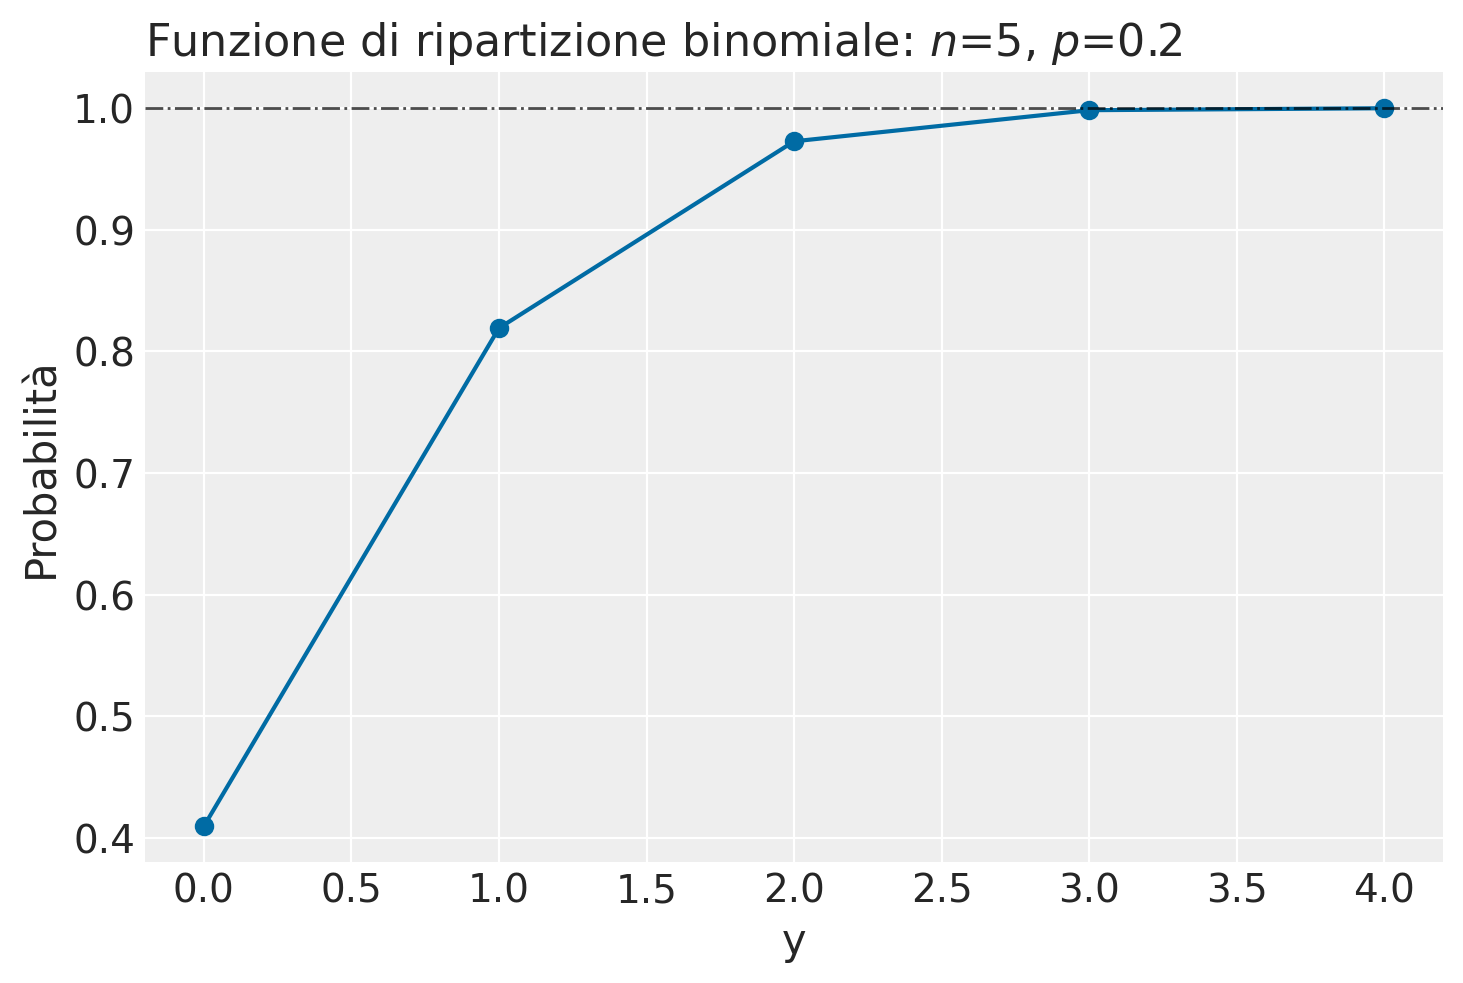

In [12]:
_, ax = plt.subplots()
ax.plot(y, st.binom.cdf(y, n=n, p=theta))
ax.scatter(y, st.binom.cdf(y, n=n, p=theta))
ax.axhline(1, color="k", alpha=0.7, linestyle="-.", lw=1)
ax.set_title(f"Funzione di ripartizione binomiale: $n$={5}, $p$={theta}", loc="left")
ax.set_xlabel("y")
ax.set_ylabel("Probabilità")

Resta da capire come generare una sequenza casuale di valori da una distribuzione Binomiale. Per fare questo, prima definiamo una variabile casuale Binomiale con determinati parametri. Per esempio, definiamo una Binomiale di ordine $n$ = 5 e $p$ = 0.5.

In [14]:
n = 5
p = 0.5
rv = st.binom(n, p)

Possiamo poi esaminare un certo numero di realizzazioni di questa variabile casuale mediante il metodo `rvs`. Per esempio, consideriamo 30 realizzazioni della v.c. `rv`.  

In [15]:
x = rv.rvs(30)
print(*x)

1 3 1 2 4 4 2 2 1 3 4 3 0 3 1 1 4 3 2 4 1 4 2 2 4 4 5 3 4 2


### Valore atteso e deviazione standard

La media (numero atteso di successi in $n$ prove) e la deviazione standard di una distribuzione binomiale si trovano nel modo seguente:

$$
\begin{align}
\mu    &= n\theta,  \notag \\
\sigma &= \sqrt{n\theta(1-\theta)}.
\end{align}
$$ (eq-mean-var-binomial)

```{admonition} Dimostrazione
Essendo $Y$ la somma di $n$ prove Bernoulliane indipendenti $Y_i$, è facile vedere che

$$
\begin{align}
\mathbb{E}(Y) &= \mathbb{E}\left( \sum_{i=1}^n Y_i \right) = \sum_{i=1}^n \mathbb{E}(Y_i) = n\theta, \\
\mathbb{V}(Y) &= \mathbb{V} \left( \sum_{i=1}^n Y_i \right) = \sum_{i=1}^n \mathbb{V}(Y_i) = n \theta (1-\theta).
\end{align}
$$
```

Si trovino il valore atteso e la varianza del lancio di quattro monete con probabilità di successo pari a $\theta = 0.2$.

Il valore atteso è $\mu = n \theta = 4 \cdot 0.2 = 0.8.$ Ciò significa che, se l'esperimento casuale venisse ripetuto infinite volte, l'esito testa verrebbe osservato un numero medio di volte pari a 0.8. La varianza è $n \theta (1-\theta) = 4 \cdot 0.2 \cdot (1 - 0.2) = 0.64$.

## Distribuzione discreta uniforme

Abbiamo già introdotto la distribuzione uniforme in precedenza. Ricordiamo che una distribuzione discreta uniforme è una distribuzione di probabilità discreta che è uniforme su un insieme, ovvero che attribuisce ad ogni elemento dell'insieme discreto e finito $S$ su cui è definita la stessa probabilità $p$ di verificarsi.

Si consideri una variabile casuale $X$ con supporto $1, 2, \dots, m$. Un esperimento casuale in cui si verifica questa distribuzione è la scelta casuale di un intero compreso tra 1 e $m$ inclusi. Sia $X$ il numero scelto. Allora

$$
P(X = x) = \frac{1}{m}, \quad x = 1, \dots, m.
$$

Il valore atteso di $X$ è

$$
\mathbb{E}(X) = \sum_{x=1}^m x f_X(x) = \sum_{x=1}^m x \frac{1}{m} = \frac{1}{m} (1 + 2 + \dots + m) = \frac{m+1}{2},
$$

dove abbiamo utilizzato l'identità $1+2+···+m = m(m+1)/2$.

Per trovare la varianza, prima calcoliamo

$$
\mathbb{E}(X^2) = \frac{1}{m} \sum_{x=1}^m x^2,
$$ 

e poi troviamo

$$
\mathbb{V}(X) = \mathbb{E}(X^2) - \left[\mathbb{E}(X)\right]^2.
$$

## Distribuzione beta-binomiale

La distribuzione beta-binomiale di parametri $N$, $\alpha$ e $\beta$ è una distribuzione discreta con una funzione di massa di probabilità uguale a

$$
BetaBinomial(y \mid N, \alpha, \beta) = \binom{N}{y} \frac{B(y + \alpha, N-y+\beta)}{B(\alpha, \beta)},
$$ (eq-beta-binom-formula)

dove la funzione beta è $B(u, v) = \frac{\Gamma(u)\Gamma(v)}{\Gamma(u+v)}$.

## Commenti e considerazioni finali

La distribuzione binomiale è una distribuzione di probabilità discreta che descrive il numero di successi in un processo di Bernoulli, ovvero la variabile aleatoria $Y = Y_1 + \dots + Y_n$ che somma $n$ variabili casuali indipendenti di uguale distribuzione di Bernoulli $\mathcal{B}(\theta)$, ognuna delle quali può fornire due soli risultati: il successo con probabilità $\theta$ e l'insuccesso con probabilità $1 - \theta$.

La distribuzione binomiale è molto importante per le sue molte applicazioni. Nelle presenti dispense dedicate all'analisi bayesiana, è importante perché costituisce il fondamento del caso più semplice dell'*aggiornamento bayesiano*, ovvero il caso Beta-Binomiale. Il modello Beta-Binomiale fornisce un esempio paradigmatico dell'approccio bayesiano all'inferenza e sarà trattato in maniera analitica nei capitoli successivi. È dunque importante che le proprietà della distribuzione binomiale risultino ben chiare.
